# IMPORTING ALL PYTHON LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading data from csv file using panda to panda dataframes

In [4]:
df_titanic = pd.read_csv('tested.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# printing first five rows of dataframe using head() function

In [7]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#getting information from the data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# HANDLING MISSING VALUES

In [11]:
#dropping cabin column from my dataframe as it cantain many null values
df_titanic = df_titanic.drop(columns='Cabin', axis=1)

In [6]:
#check number of missing values in each column i.e counting of missing values
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#taking mean of age column and replacing missing values in age column with the mean value
df_titanic['Age'].fillna(df_titanic['Age'].mean() , inplace=True)

In [13]:
#finding mode value from FARE COLUMN 
#let's print it
print(df_titanic['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [14]:
print(df_titanic['Fare'].mode()[0])

7.75


In [15]:
#replacing missing value of fare column with mode value as there are very less null values
df_titanic['Fare'].fillna(df_titanic['Fare'].mode()[0],inplace=True)

In [17]:
#again checking missing values count
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [18]:
#finding number of people survived and not survived
df_titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [19]:
#Data Visualization
#plotting graphs 
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

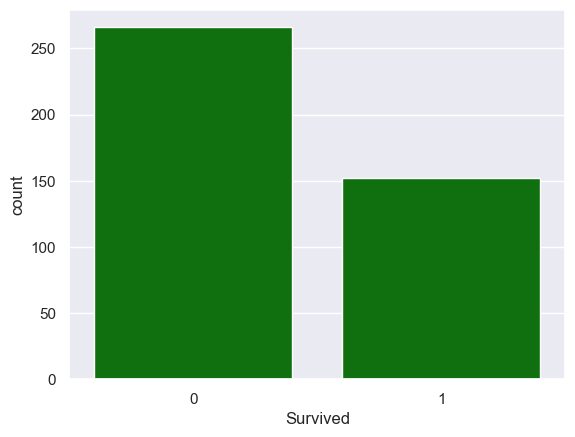

In [31]:
#making countplot for "Survived" column
sns.countplot(x="Survived",data=df_titanic,color='green')

<Axes: xlabel='Sex', ylabel='count'>

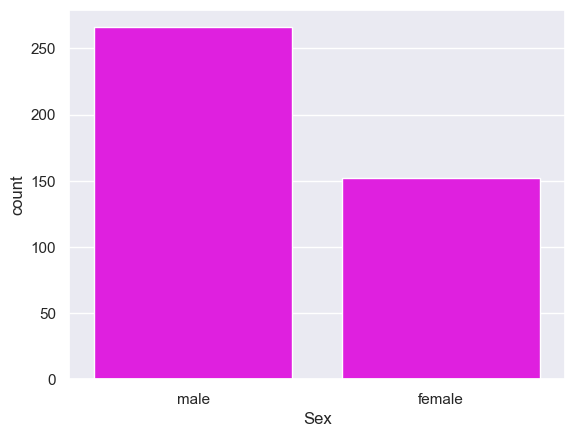

In [32]:
#making countplot for "Sex" column
sns.countplot(x="Sex",data=df_titanic,color='magenta')

In [33]:
df_titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

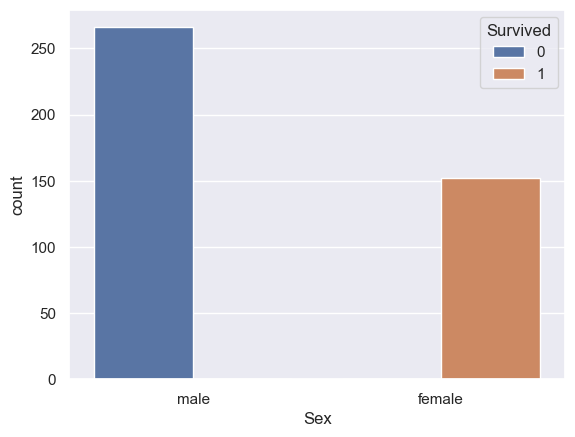

In [35]:
#number of females and males survived by plotting graphs
sns.countplot(x='Sex', hue='Survived',data=df_titanic)

In [36]:
#it clearly shows that all females survived and all males do not survived

<Axes: xlabel='Pclass', ylabel='count'>

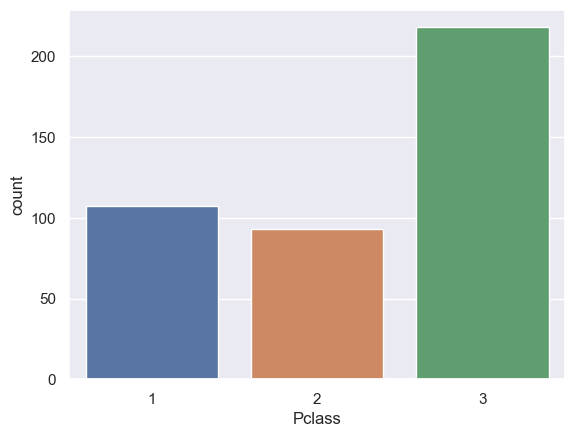

In [37]:
#making countplot for "Pclass" column
sns.countplot(x="Pclass",data=df_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

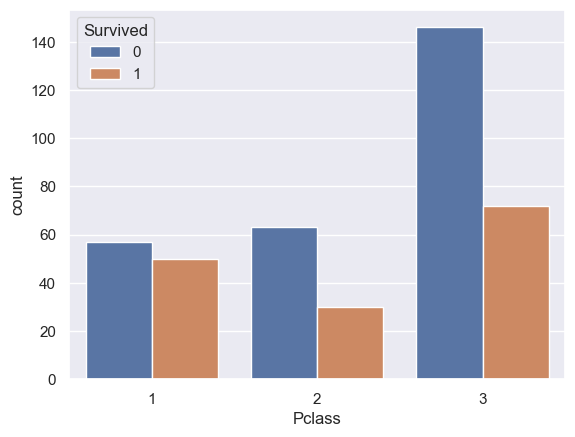

In [38]:
#countplot for survivors based on particular Pclass
sns.countplot(x='Pclass', hue='Survived',data=df_titanic)

<Axes: xlabel='Parch', ylabel='count'>

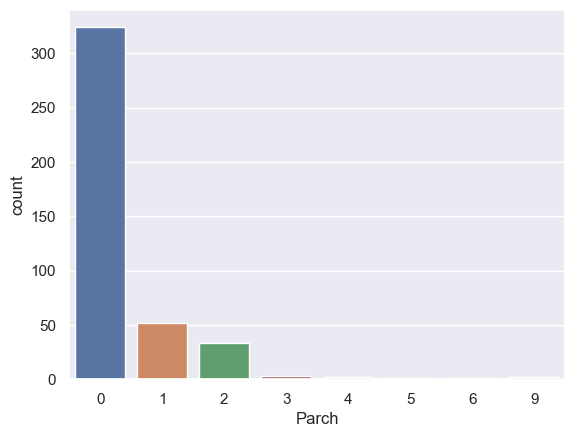

In [39]:
#countplot on basis of parch column
sns.countplot(x="Parch",data=df_titanic)

<Axes: xlabel='Parch', ylabel='count'>

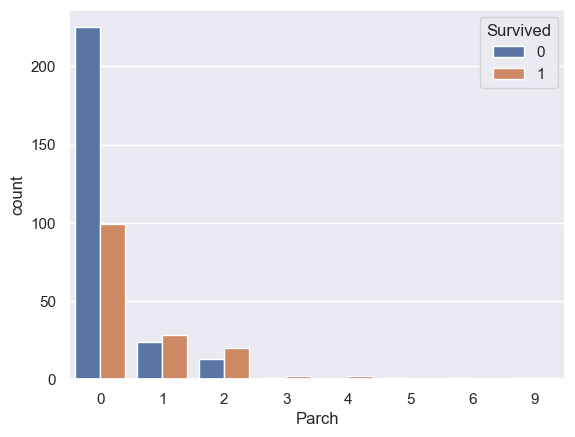

In [40]:
#countplot for survivors based on Parch
sns.countplot(x='Parch', hue='Survived',data=df_titanic)

In [43]:
#Encoding the categorical data- converting strings to number
df_titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [44]:
df_titanic['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [46]:
#conversion
df_titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [47]:
#print data for checking
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [48]:
#Seperating features and target
X = df_titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df_titanic['Survived']

In [49]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [50]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Splitting data into training data and testing data

In [51]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


# Training of the model

In [53]:
model = LogisticRegression()

# Logistic Regression

In [1]:
#training the logisitic regression model by training data
model.fit(X_train,Y_train)

In [55]:
#Model evaluation
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [56]:
print(X_train_prediction )

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [57]:
#now we need to compare it with the original values
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


In [58]:
#acuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [59]:
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of training data:',testing_data_accuracy)

Accuracy score of training data: 1.0
